In [6]:
import pandas as pd
import numpy as np

# Text Preprocessing & Cleaning
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re


from sklearn.model_selection import train_test_split # Split Data
from imblearn.over_sampling import SMOTE # Handling Imbalanced

# Model Building
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import LabelEncoder # Import LabelEncoder


from sklearn.metrics import classification_report , confusion_matrix , accuracy_score # Performance Metrics


# Data Visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from termcolor import cprint
import seaborn as sns
import warnings


warnings.filterwarnings('ignore')
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [7]:
df = pd.read_csv("/content/Tweets.csv", usecols=["airline_sentiment", "airline_sentiment_confidence", "airline"])

In [8]:
df.head(5)

,airline_sentiment,airline_sentiment_confidence,airline
0,neutral,1.0000,Virgin America
1,positive,0.3486,Virgin America
2,neutral,0.6837,Virgin America
3,negative,1.0000,Virgin America
4,negative,1.0000,Virgin America


In [9]:
import pandas as pd

df = pd.read_csv("Tweets.csv")
print(df.shape)
print(df.columns)
print(df.head(5))


(14640, 12)
Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline', 'name',
       'text', 'tweet_coord', 'tweet_created', 'tweet_location',
       'user_timezone'],
      dtype='object')
       tweet_id airline_sentiment  airline_sentiment_confidence  \
0  5.700000e+17           neutral                        1.0000   
1  5.700000e+17          positive                        0.3486   
2  5.700000e+17           neutral                        0.6837   
3  5.700000e+17          negative                        1.0000   
4  5.700000e+17          negative                        1.0000   

  negativereason  negativereason_confidence         airline        name  \
0            NaN                        NaN  Virgin America     cairdin   
1            NaN                     0.0000  Virgin America    jnardino   
2            NaN                        NaN  Virgin America  yvonnalynn   
3     Bad Flight            

In [10]:
df.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,5.700000e+17,positive,0.3487,NaN,0.0000,American,KristenReenders,@AmericanAir thank you we got on a different f...,NaN,22-02-2015 12:01,NaN,NaN
14636,5.700000e+17,negative,1.0000,Customer Service Issue,1.0000,American,itsropes,@AmericanAir leaving over 20 minutes Late Flig...,NaN,22-02-2015 11:59,Texas,NaN
14637,5.700000e+17,neutral,1.0000,NaN,NaN,American,sanyabun,@AmericanAir Please bring American Airlines to...,NaN,22-02-2015 11:59,"Nigeria,lagos",NaN
14638,5.700000e+17,negative,1.0000,Customer Service Issue,0.6659,American,SraJackson,"@AmericanAir you have my money, you change my ...",NaN,22-02-2015 11:59,New Jersey,Eastern Time (US & Canada)
14639,5.700000e+17,neutral,0.6771,NaN,0.0000,American,daviddtwu,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,22-02-2015 11:58,"dallas, TX",NaN


# **EDA PART**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  float64
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   name                          14640 non-null  object 
 7   text                          14640 non-null  object 
 8   tweet_coord                   1019 non-null   object 
 9   tweet_created                 14640 non-null  object 
 10  tweet_location                9907 non-null   object 
 11  user_timezone                 9820 non-null   object 
dtypes: float64(3), object(9)
memory usage: 1.3+ MB


In [12]:
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence
count,1.464000e+04,14640.000000,10522.000000
mean,5.692605e+17,0.900169,0.638298
std,8.098842e+14,0.162830,0.330440
min,5.680000e+17,0.335000,0.000000
25%,5.690000e+17,0.692300,0.360600
50%,5.690000e+17,1.000000,0.670600
75%,5.700000e+17,1.000000,1.000000
max,5.700000e+17,1.000000,1.000000


In [13]:
df.shape

(14640, 12)

In [14]:
df.isnull().sum()

,0
tweet_id,0
airline_sentiment,0
airline_sentiment_confidence,0
negativereason,5462
negativereason_confidence,4118
airline,0
name,0
text,0
tweet_coord,13621
tweet_created,0


In [15]:
# Unique sentiment classes
print("Sentiment categories:", df["airline_sentiment"].unique())
print(df["airline_sentiment"].value_counts())
print(df["airline_sentiment_confidence"].describe())


Sentiment categories: ['neutral' 'positive' 'negative']
airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64
count    14640.000000
mean         0.900169
std          0.162830
min          0.335000
25%          0.692300
50%          1.000000
75%          1.000000
max          1.000000
Name: airline_sentiment_confidence, dtype: float64


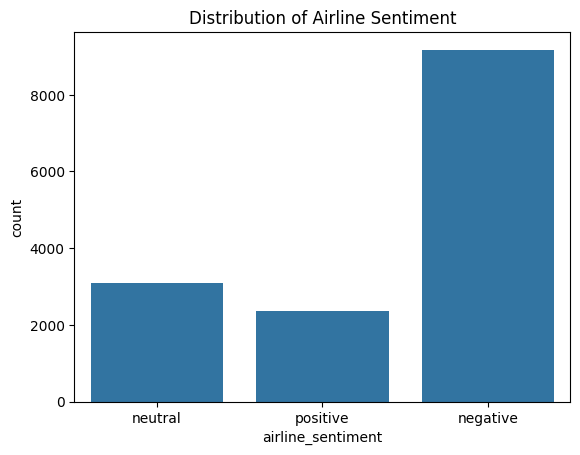

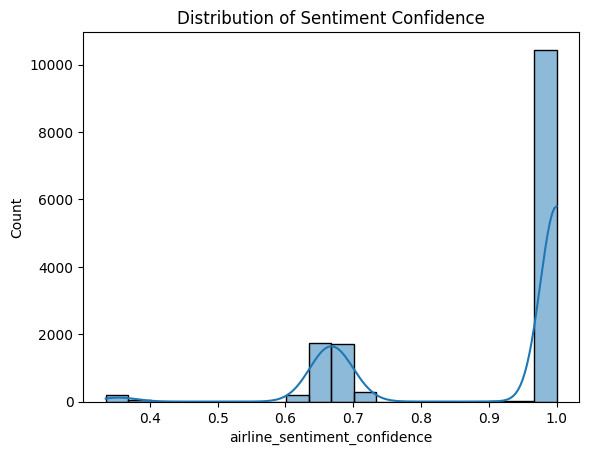

In [16]:
sns.countplot(data=df, x="airline_sentiment")
plt.title("Distribution of Airline Sentiment")
plt.show()

# Sentiment confidence distribution
sns.histplot(df["airline_sentiment_confidence"], bins=20, kde=True)
plt.title("Distribution of Sentiment Confidence")
plt.show()

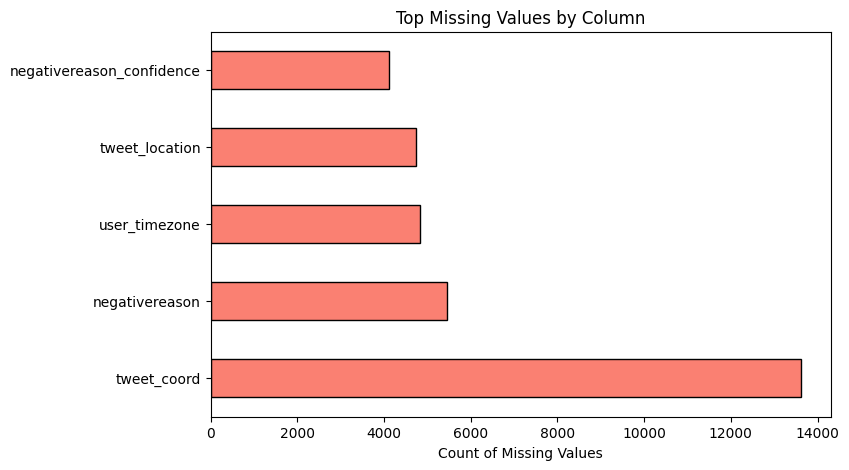

In [17]:
missing = df.isna().sum()
missing = missing[missing > 0].sort_values(ascending=False)

if missing.empty:
    print("✅ No missing values in this dataset!")
else:
    plt.figure(figsize=(8,5))
    missing.head(15).plot(kind="barh", color="salmon", edgecolor="black")
    plt.title("Top Missing Values by Column")
    plt.xlabel("Count of Missing Values")
    plt.show()


In [18]:
##Duplicate Rows
print("\nDuplicate rows:", df.duplicated().sum())


Duplicate rows: 39


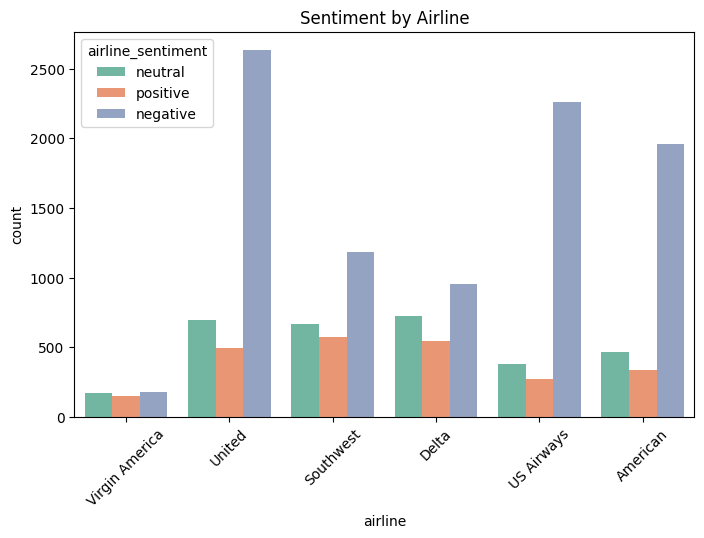

In [19]:
# Sentiment by airline
plt.figure(figsize=(8,5))
sns.countplot(x='airline', hue='airline_sentiment', data=df, palette="Set2")
plt.title("Sentiment by Airline")
plt.xticks(rotation=45)
plt.show()

In [20]:
## Descriptive Statistics
print("\nNumeric Summary:")
print(df.describe())


Numeric Summary:
           tweet_id  airline_sentiment_confidence  negativereason_confidence
count  1.464000e+04                  14640.000000               10522.000000
mean   5.692605e+17                      0.900169                   0.638298
std    8.098842e+14                      0.162830                   0.330440
min    5.680000e+17                      0.335000                   0.000000
25%    5.690000e+17                      0.692300                   0.360600
50%    5.690000e+17                      1.000000                   0.670600
75%    5.700000e+17                      1.000000                   1.000000
max    5.700000e+17                      1.000000                   1.000000


# **Data Preprocessing and Cleaning**

In [21]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()                                # lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)     # remove URLs
    text = re.sub(r'@\w+|#\w+', '', text)                   # remove mentions/hashtags
    text = re.sub(r'[^a-z\s]', '', text)                    # remove special chars/numbers
    text = " ".join([lemmatizer.lemmatize(word)
                     for word in text.split()
                     if word not in stop_words and len(word) > 2])  # remove stopwords & short tokens
    return text

df['clean_text'] = df['text'].apply(clean_text)
df[['text','clean_text']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,text,clean_text
0,@VirginAmerica What @dhepburn said.,said
1,@VirginAmerica plus you've added commercials t...,plus youve added commercial experience tacky
2,@VirginAmerica I didn't today... Must mean I n...,didnt today must mean need take another trip
3,@VirginAmerica it's really aggressive to blast...,really aggressive blast obnoxious entertainmen...
4,@VirginAmerica and it's a really big bad thing...,really big bad thing


**Feature Relationships**

In [22]:
## CrossTabs
# Crosstab: count of sentiments per airline
ct = pd.crosstab(df["airline"], df["airline_sentiment"])
print(ct)

# Normalize to proportions
ct_norm = pd.crosstab(df["airline"], df["airline_sentiment"], normalize="index")
print(ct_norm)


airline_sentiment  negative  neutral  positive
airline                                       
American               1960      463       336
Delta                   955      723       544
Southwest              1186      664       570
US Airways             2263      381       269
United                 2633      697       492
Virgin America          181      171       152
airline_sentiment  negative   neutral  positive
airline                                        
American           0.710402  0.167814  0.121783
Delta              0.429793  0.325383  0.244824
Southwest          0.490083  0.274380  0.235537
US Airways         0.776862  0.130793  0.092345
United             0.688906  0.182365  0.128728
Virgin America     0.359127  0.339286  0.301587


# **Data Visualization**

Total number of sentiments of tweets :
airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64


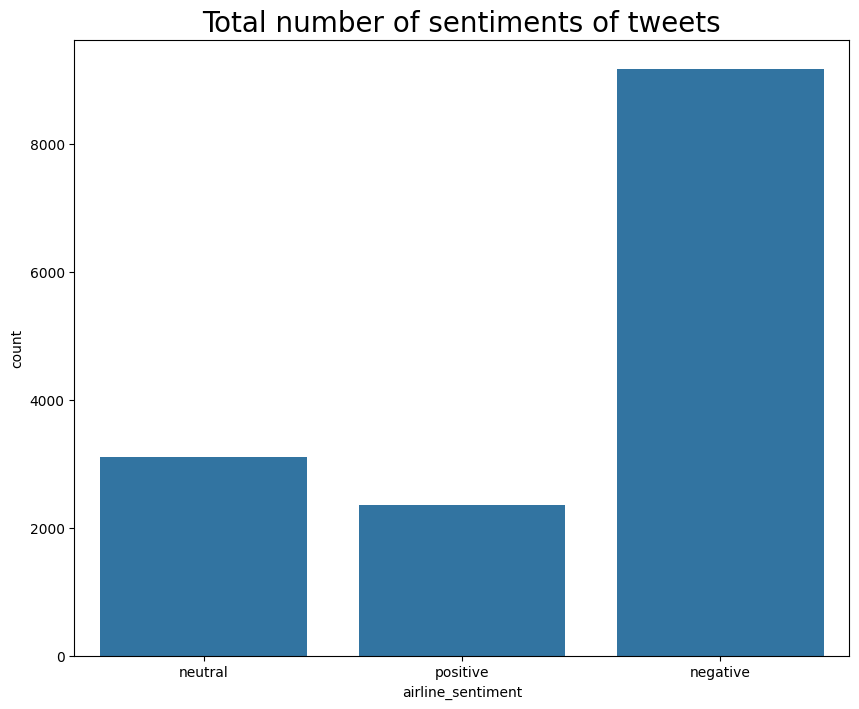

In [23]:
cprint("Total number of sentiments of tweets :",'green')
print(df.airline_sentiment.value_counts())
plt.figure(figsize = (10, 8))
ax = sns.countplot(x = 'airline_sentiment', data = df)
ax.set_title(label = 'Total number of sentiments of tweets', fontsize = 20)
plt.show()

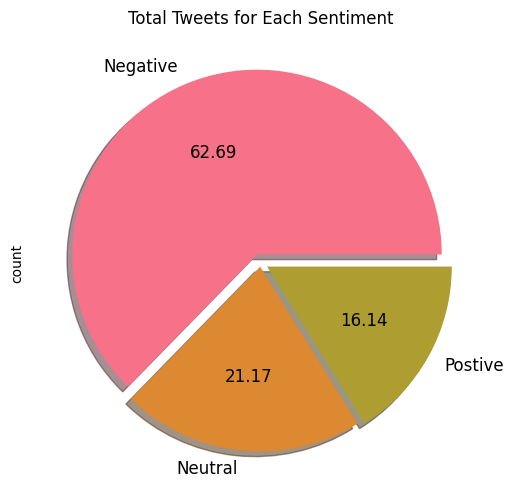

In [24]:
ax.set_title(label = 'Total number of sentiments of tweets:')
colors=sns.color_palette('husl',10)
pd.Series(df['airline_sentiment']).value_counts().plot(kind='pie',colors=colors,labels=['Negative','Neutral','Postive'],explode=[0.05,0.02,0.04],shadow=True,autopct='%.2f',fontsize=12,figsize=(6,6),title="Total Tweets for Each Sentiment")

plt.show()

# **Encoding and Feature Extraction**

In [25]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# Encode target
le = LabelEncoder()
df['sentiment_encoded'] = le.fit_transform(df['airline_sentiment'])

# TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X = tfidf.fit_transform(df['clean_text']).toarray()
y = df['sentiment_encoded']

print("Feature shape:", X.shape)


Feature shape: (14640, 5000)


# Now Reasons Of Negative Tweet

Reasons Of Negative Tweets :
negativereason
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: count, dtype: int64


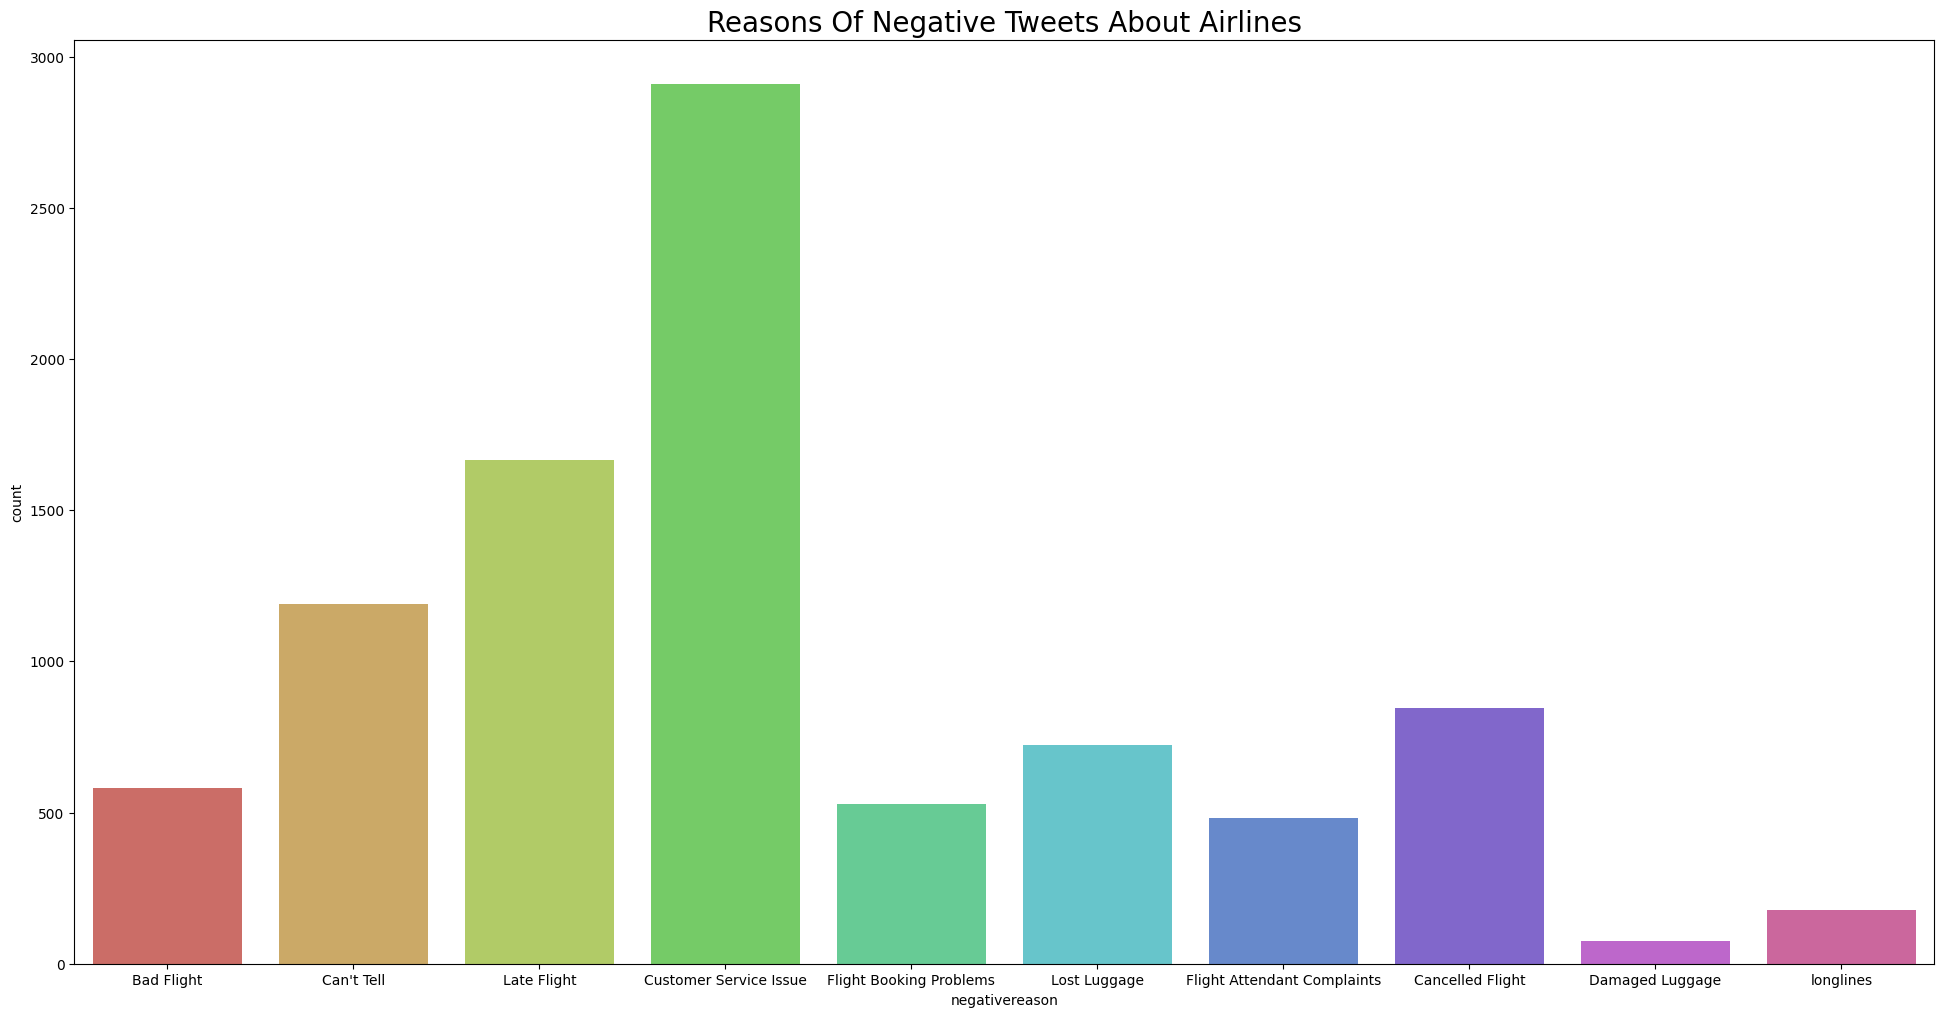

In [26]:
cprint('Reasons Of Negative Tweets :','green')
print(df.negativereason.value_counts())

plt.figure(figsize = (24, 12))
sns.countplot(x = 'negativereason', data = df, palette = 'hls')
plt.title('Reasons Of Negative Tweets About Airlines', fontsize = 20)
plt.show()

# Now Reasons Of Negative Tweets on Every AirLine Company

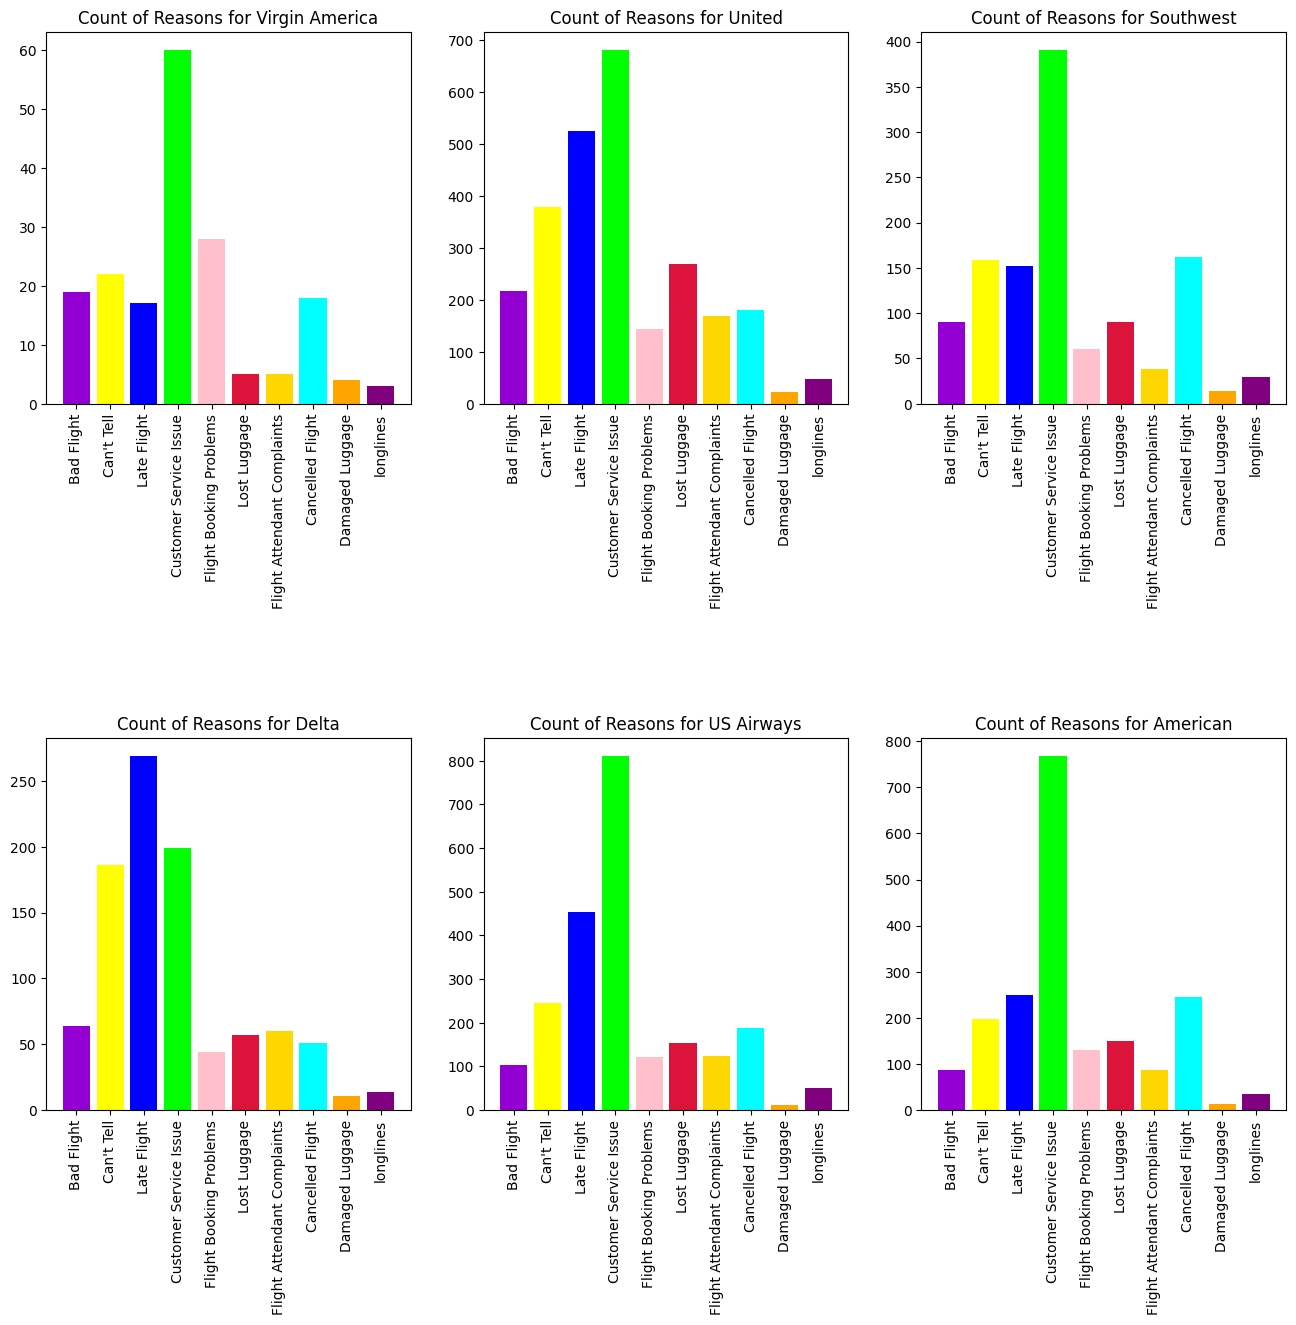

In [27]:
NR_Count=df['negativereason'].value_counts()
def NCount(Airline):
    airlineName =df[df['airline']==Airline]
    count= airlineName['negativereason'].value_counts()
    Unique_reason= df['negativereason'].unique()
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

def Plot_Reason(airline):
    a= NCount(airline)
    count=a['count']
    Id = range(1,(len(a)+1))
    plt.bar(Id,count, color=['darkviolet','yellow','blue','lime','pink','crimson','gold','cyan','orange','purple'])
    plt.xticks(Id,a['Reasons'],rotation=90)
    plt.title('Count of Reasons for '+ airline)

airline = df['airline'].unique() # Define the airline variable

plt.figure(2,figsize=(16, 14))
for i in airline:
    indices= list(airline).index(i) # Get the index from the list
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    Plot_Reason(i)

# Now World Cloud of Postive Sentiments

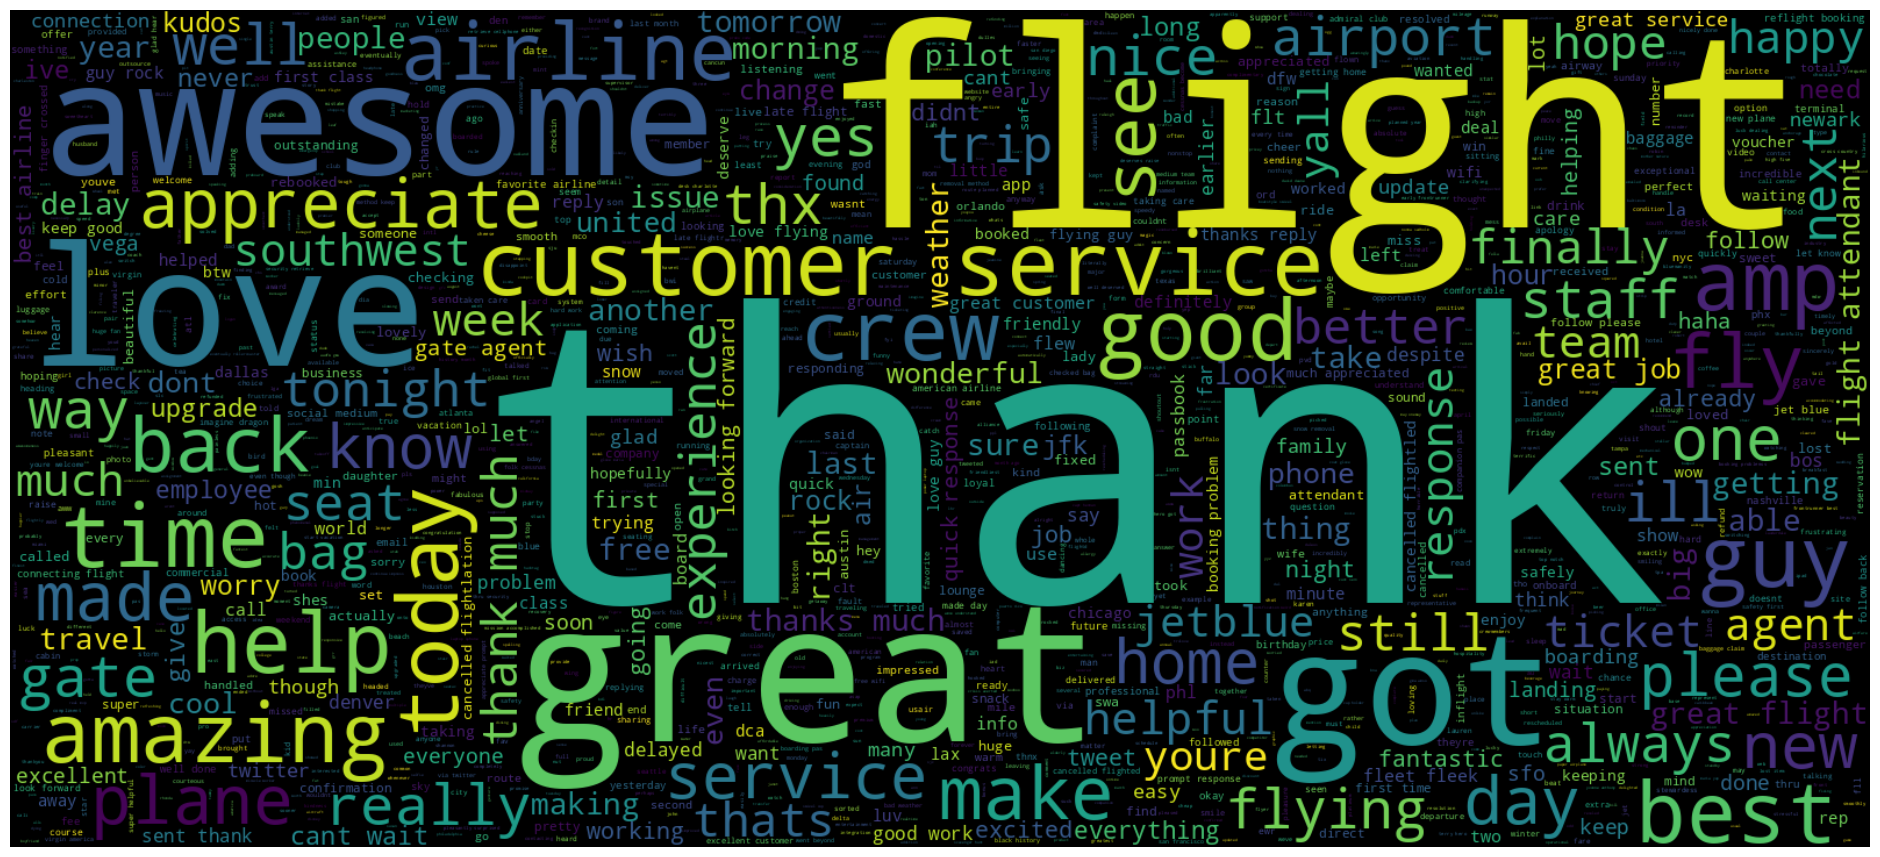

In [28]:
positive = df[df['airline_sentiment'] == 'positive']['clean_text'].str.cat(sep=' ')

plt.figure(figsize=(24,20))
world_cloud_postive=WordCloud(min_font_size=3,max_words=3200,width=1600,height=720).generate(positive)
plt.imshow(world_cloud_postive,interpolation='bilinear')
plt.axis('off') # Turn off axis numbers and ticks
plt.show()

In [29]:
# 3. Text Cleaning Function
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)   # remove URLs
    text = re.sub(r"@\w+", "", text)             # remove mentions
    text = re.sub(r"#\w+", "", text)             # remove hashtags
    text = re.sub(r"[^a-z\s]", "", text)         # remove punctuation/numbers
    return text

df["clean_text"] = df["text"].apply(clean_text)


#**Train-Test Spilt**

In [30]:
# Ensure X is a pandas Series of text
X = df["clean_text"].astype(str)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Convert to list (important for TfidfVectorizer)
X_train = X_train.tolist()
X_test = X_test.tolist()

In [39]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# **TF-IDF Encoding**

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, stop_words="english")
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf  = vectorizer.transform(X_test)


In [58]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Features & labels
X_full = df["clean_text"].astype(str)
y_full = df["airline_sentiment"]

# Vectorize full dataset
vectorizer = TfidfVectorizer(max_features=5000, stop_words="english")
X_full_tfidf = vectorizer.fit_transform(X_full)

# Model
model = LogisticRegression(max_iter=1000)

# 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Get predictions for each fold
y_pred_cv = cross_val_predict(model, X_full_tfidf, y_full, cv=cv)

# Evaluate
print("Cross-validated Accuracy:", accuracy_score(y_full, y_pred_cv))
print("\nClassification Report:\n", classification_report(y_full, y_pred_cv))
print("\nConfusion Matrix:\n", confusion_matrix(y_full, y_pred_cv))


Cross-validated Accuracy: 0.7707650273224044

Classification Report:
               precision    recall  f1-score   support

    negative       0.79      0.94      0.86      9178
     neutral       0.65      0.43      0.52      3099
    positive       0.80      0.58      0.67      2363

    accuracy                           0.77     14640
   macro avg       0.75      0.65      0.68     14640
weighted avg       0.76      0.77      0.75     14640


Confusion Matrix:
 [[8594  438  146]
 [1584 1328  187]
 [ 721  280 1362]]


In [32]:
# 7. Handle Imbalance with SMOTE (optional)
smote = SMOTE(random_state=42)
X_train_tfidf, y_train = smote.fit_resample(X_train_tfidf, y_train)


# **Model Evaluation**

In [33]:
# 8. Train Models and Evaluate
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
import xgboost as xgb

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "SVM": LinearSVC(),
    "XGBoost": xgb.XGBClassifier(eval_metric="mlogloss")
}

results = {}

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name} Results:")
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred))



Logistic Regression Results:
Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1835
           1       0.54      0.63      0.58       620
           2       0.63      0.70      0.66       473

    accuracy                           0.75      2928
   macro avg       0.68      0.71      0.69      2928
weighted avg       0.77      0.75      0.76      2928


Naive Bayes Results:
Accuracy: 0.7424863387978142
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1835
           1       0.55      0.53      0.54       620
           2       0.60      0.69      0.64       473

    accuracy                           0.74      2928
   macro avg       0.67      0.68      0.67      2928
weighted avg       0.75      0.74      0.74      2928


SVM Results:
Accuracy: 0.737363387978142
              precision    recall  f1-score   support

           0       0.86      0.81      0.84  


Logistic Regression Results:
Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1835
           1       0.54      0.63      0.58       620
           2       0.63      0.70      0.66       473

    accuracy                           0.75      2928
   macro avg       0.68      0.71      0.69      2928
weighted avg       0.77      0.75      0.76      2928



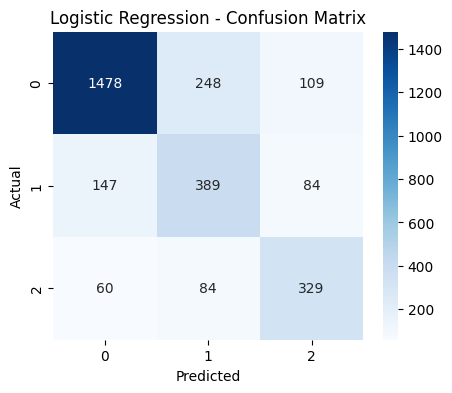


Naive Bayes Results:
Accuracy: 0.7424863387978142
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1835
           1       0.55      0.53      0.54       620
           2       0.60      0.69      0.64       473

    accuracy                           0.74      2928
   macro avg       0.67      0.68      0.67      2928
weighted avg       0.75      0.74      0.74      2928



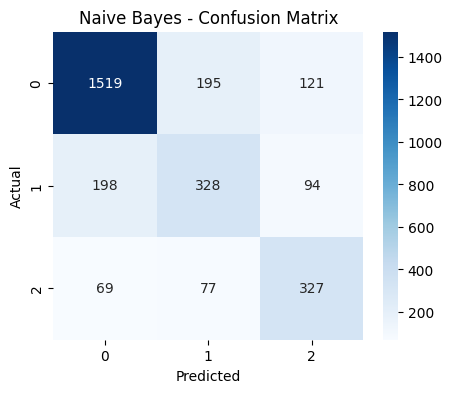


SVM Results:
Accuracy: 0.737363387978142
              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1835
           1       0.52      0.57      0.54       620
           2       0.60      0.66      0.63       473

    accuracy                           0.74      2928
   macro avg       0.66      0.68      0.67      2928
weighted avg       0.75      0.74      0.74      2928



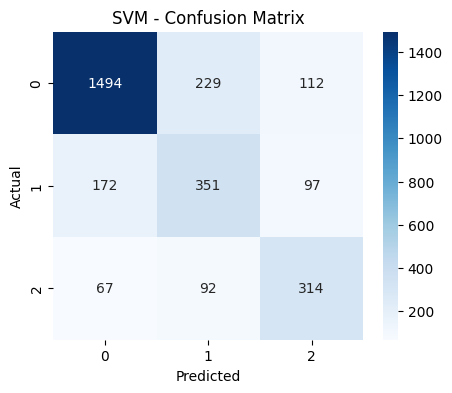


XGBoost Results:
Accuracy: 0.7254098360655737
              precision    recall  f1-score   support

           0       0.86      0.77      0.81      1835
           1       0.50      0.68      0.57       620
           2       0.67      0.62      0.64       473

    accuracy                           0.73      2928
   macro avg       0.67      0.69      0.68      2928
weighted avg       0.75      0.73      0.73      2928



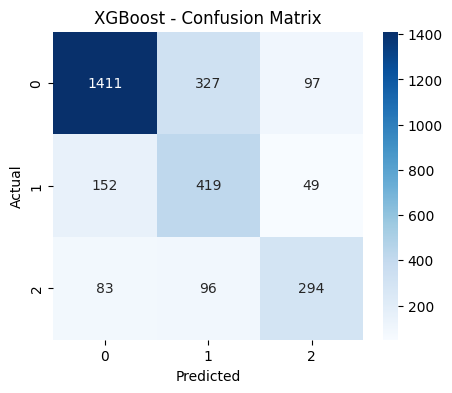

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train & Evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"\n{name} Results:")
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred))

    # 🔹 Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=model.classes_ if hasattr(model, "classes_") else None,
                yticklabels=model.classes_ if hasattr(model, "classes_") else None)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


# **Accuracy, Precesion, Recall Scores**

In [35]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Dictionary to store results
results = {}

# Evaluate each model
for name, model in models.items():
    y_pred = model.predict(X_test_tfidf)

    acc = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_test, y_pred, average="weighted"
    )

    results[name] = {
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1
    }

# Convert results to DataFrame for easy comparison
import pandas as pd
results_df = pd.DataFrame(results).T

print("📊 Model Comparison:")
display(results_df)


📊 Model Comparison:


,Accuracy,Precision,Recall,F1-score
Logistic Regression,0.750000,0.765778,0.750000,0.755971
Naive Bayes,0.742486,0.746236,0.742486,0.743751
SVM,0.737363,0.747867,0.737363,0.741742
XGBoost,0.725410,0.750544,0.725410,0.733474


In [36]:
# Define label mapping
label_map = {0: "Negative", 1: "Neutral", 2: "Positive"}

# Pick a tweet from dataset
tweet_n = 2
new_tweet = [df["clean_text"].iloc[tweet_n]]

# Transform with TF-IDF
new_tweet_tfidf = tfidf.transform(new_tweet)

print("Tweet:", new_tweet[0])
print('-'*60)

# Predict with each model
for name, model in models.items():
    try:
        probs = model.predict_proba(new_tweet_tfidf)[0]
        pred_class = probs.argmax()
        print(f"{name} → Probabilities (Neg, Neutral, Pos): {probs}")
        print(f"{name} → Predicted Sentiment: {label_map[pred_class]}")
    except:
        pred = model.predict(new_tweet_tfidf)[0]
        print(f"{name} → Predicted Sentiment: {label_map[pred]}")

# True label (from dataset y)
true_label = y.iloc[tweet_n]
print("True Label:", label_map[true_label])


Tweet:  i didnt today must mean i need to take another trip
------------------------------------------------------------
Logistic Regression → Probabilities (Neg, Neutral, Pos): [0.55256222 0.37857433 0.06886345]
Logistic Regression → Predicted Sentiment: Negative
Naive Bayes → Probabilities (Neg, Neutral, Pos): [0.39595539 0.44781714 0.15622746]
Naive Bayes → Predicted Sentiment: Neutral
SVM → Predicted Sentiment: Negative
XGBoost → Probabilities (Neg, Neutral, Pos): [0.4356906  0.4998216  0.06448778]
XGBoost → Predicted Sentiment: Neutral
True Label: Neutral


In [41]:
tweet_n = 2
tweets = list(X_test_raw)
labels = list(y_test)

# Example with Logistic Regression
model = models["Logistic Regression"]
probs = model.predict_proba(X_test_tfidf)

print("Tweet:", tweets[tweet_n])
print('-'*50)
print("Probabilities (Neg, Neutral, Pos):", probs[tweet_n])
print("True Label:", label_map[true_label])


Tweet:  i cheated on you and im sorry ill never do it again  has given my wife and i the worst start to a honeymoon ever
--------------------------------------------------
Probabilities (Neg, Neutral, Pos): [0.87373587 0.09860546 0.02765867]
True Label: Neutral


In [61]:
# Pick any index within full dataset (~14k)
tweet_n = 10000
tweet = df["clean_text"].iloc[tweet_n]
true_label = df["airline_sentiment"].iloc[tweet_n]

tweet_tfidf = vectorizer.transform([tweet])


model = models["Logistic Regression"]
probs = model.predict_proba(tweet_tfidf)[0]
pred_label = model.predict(tweet_tfidf)[0]

label_map = {0: "negative", 1: "neutral", 2: "positive"}
if isinstance(true_label, (int, np.integer)):
    true_label = label_map[true_label]
if isinstance(pred_label, (int, np.integer)):
    pred_label = label_map[pred_label]

print("Tweet:", tweet)
print('-'*50)
print("Index:", tweet_n, "out of", len(df))
print("Probabilities (Neg, Neutral, Pos):", probs)
print("True Label:", true_label)
print("Predicted Label:", pred_label)


Tweet:  waiting all day at atl since flight this am cancelled flightled  standby told no seats and group of  shows up late flight and gets on to phl
--------------------------------------------------
Index: 10000 out of 14640
Probabilities (Neg, Neutral, Pos): [0.3708252  0.47012209 0.15905271]
True Label: negative
Predicted Label: neutral
